### LABORATORIO N° 13
Alumno: Dennis Pumaraime Espinoza

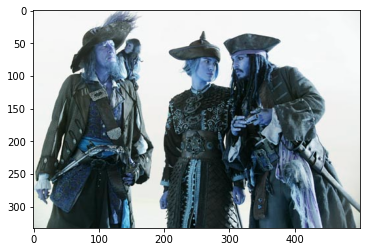

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('imagenes/piratas.jpg')

plt.imshow(img)

### 1. Cambien el tipo de color a RGB

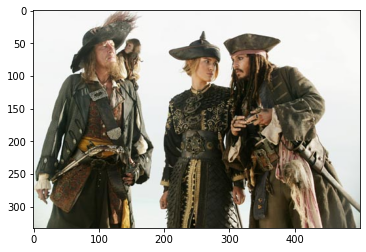

In [57]:
fix_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)

### 2. Hagan girar una imagen

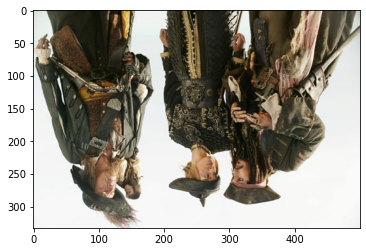

In [58]:
rot_img = cv2.flip(fix_img, 0)
plt.imshow(rot_img)

### 3. Dibujen un círculo sobre las caras de dicha figura y agreguen un texto que describa que es (persona, perro, gato).

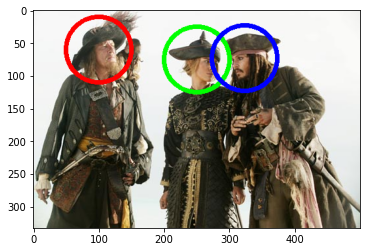

In [59]:
forma_img = fix_img
cv2.circle(forma_img, center=(100,60), radius=50, color =(255,0,0), thickness=5)
cv2.circle(forma_img, center=(250,75), radius=50, color =(0,255,0), thickness=5)
cv2.circle(forma_img, center=(323,73), radius=50, color =(0,0,255), thickness=5)
plt.imshow(forma_img)

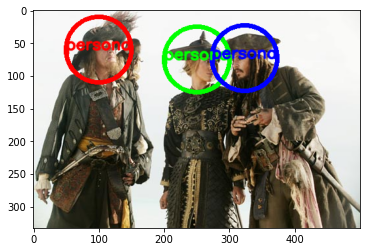

In [60]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(forma_img,text='persona',org=(50,60),fontFace=font, fontScale=0.8,color=(255,0,0),thickness=2,lineType=cv2.LINE_AA)
cv2.putText(forma_img,text='persona',org=(200,75),fontFace=font, fontScale=0.8,color=(0,255,0),thickness=2,lineType=cv2.LINE_AA)
cv2.putText(forma_img,text='persona',org=(273,73),fontFace=font, fontScale=0.8,color=(0,0,255),thickness=2,lineType=cv2.LINE_AA)
plt.imshow(forma_img)

### 4. Guarden la figura con los círculos dibujados y el texto generado

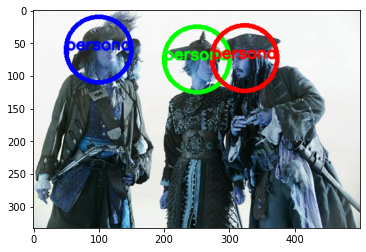

In [61]:
forma_img = cv2.cvtColor(forma_img,cv2.COLOR_RGB2BGR) # se regresa la imagen a BGR para que imwrite de cv2 interprete bien los colores
cv2.imwrite('imagenes/piratas_circulos_textos.jpg',forma_img)
plt.imshow(forma_img)

### 5. En una imagen distinta al anterior creen una pentágono sobre las caras de las figuras y agreguen un texto que describa que es (persona, perro, gato).

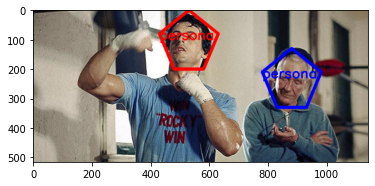

In [62]:
img02 = cv2.imread('imagenes/rocky.jpg')
img02_fix = cv2.cvtColor(img02,cv2.COLOR_BGR2RGB)

def crear_pentagono(mov_x, mov_y): 
    return np.array([[100 + mov_x, mov_y],
                     [200 + mov_x, 80 + mov_y],
                     [150 + mov_x, 200 + mov_y],
                     [50 + mov_x, 200 + mov_y],
                     [0 + mov_x, 80 + mov_y]],np.int32)

cv2.polylines(img02_fix,[crear_pentagono(430,0)],True,(255,0,0),thickness=10)
cv2.polylines(img02_fix,[crear_pentagono(780,130)],True,(0,0,255),thickness=10)
cv2.putText(img02_fix,text='persona',org=(430,100),fontFace=font, fontScale=1.5,color=(255,0,0),thickness=3,lineType=cv2.LINE_AA)
cv2.putText(img02_fix,text='persona',org=(780,230),fontFace=font, fontScale=1.5,color=(0,0,255),thickness=3,lineType=cv2.LINE_AA)

plt.imshow(img02_fix)

### 6. Creen un programa que permita dibujar diferentes tipos de figuras geométricas con el uso de eventos de mouse para poder hacer dibujos y luego guarden la imagen.

In [63]:
# programa que dibuja circulos de color rojo con el clic izquierdo 
# y cuadrados azules con el clic derecho del mouse

def draw_figures(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img_figuras, (x,y), 25, (0,0,255), 3)
    if event == cv2.EVENT_RBUTTONDOWN:
        cv2.rectangle(img_figuras, (x,y),(x+50,y+50), (255,0,0), 3)

img_figuras = np.zeros((512,512,3))
cv2.namedWindow(winname = 'drawing')
cv2.setMouseCallback('drawing', draw_figures)

while True:
    cv2.imshow('drawing', img_figuras)
    if cv2.waitKey(20)% 0xff == 27:
        break

cv2.destroyAllWindows()

cv2.imwrite('imagenes/figuras_geometricas.jpg',img_figuras) # guardado de imagen


True

### 7. Modifiquen el programa para agregar funciones adicionales.

In [64]:
# programa que con el clic izquierdo del ratón dibuja circulos con etiquetas
# que crecen y cambian de color en tonalidades verdes a medida que se presionan los clics
# y con el clic derecho dibuja cuadrados con etoquetas que decrecen 
# y cambian de color en tonalidades azules

def draw_dinamic(event, x, y, flags, param):
    global size
    if event == cv2.EVENT_LBUTTONDOWN:
        if size < 100:
            size += 5
        cv2.circle(img_figuras_di, (x,y), size, (0,1,1-size/100), 3)
        cv2.putText(img_figuras_di,text='circulo',org=(x-int(size/2),y),fontFace=font, fontScale=size/100,color=(0,1,1-size/100),thickness=2,lineType=cv2.LINE_AA)
    if event == cv2.EVENT_RBUTTONDOWN:
        if size > 0:
            size -= 5
        cv2.rectangle(img_figuras_di, (x,y), (x+(size*2),y+(size*2)), (1,1-size/100,0), 3)
        cv2.putText(img_figuras_di,text='cuadrado',org=(x+int(size/2),y+int(size)),fontFace=font, fontScale=size/100,color=(1,1-size/100,0),thickness=2,lineType=cv2.LINE_AA)

size = 0

img_figuras_di = np.zeros((512,512,3))
cv2.namedWindow(winname = 'drawing_dinamic')
cv2.setMouseCallback('drawing_dinamic', draw_dinamic)

while True:
    cv2.imshow('drawing_dinamic', img_figuras_di)
    if cv2.waitKey(20)% 0xff == 27:
        break

cv2.destroyAllWindows()


REFERENCIAS: 
Repositorio Github: https://github.com/dpuma/computacion_grafica/tree/main/lab_13/opencv_2
Video demostración: https://drive.google.com/file/d/1mPQB51Jb2gm9fVCyurKUWSqdoCVy_0uR/view?usp=sharing